In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [ ]:
names=["charId","journalId","sheetId","type","code","entity","region","baseline","italicFlag","boldFlag","quality","width","height","parentCharId","link","imageName","rectlx","rectly","rectrx","rectry","wordID","wordMath","wordTex","wordIML","wordRectRY","wordRectRX","wordRectLY","wordRectLX","lineContinueFlag"]
reader = csv.DictReader(open("InftyCDB-1.csv",errors='ignore'),fieldnames=names)
writer = csv.writer(open("MyData.csv","w+"))
writer.writerow(names)

r=0
i=0
for row in reader:
    i+=1
    if row['type']=="Roman" or row['type']=="Numeric" or row['type']=="Operator" or row['type']=="Parenthesis" or row['type']=="Point":
        r+=1
        writer.writerow(row.values())
#         print(row)
print("Total Roman count",r)
print("Total count",i)

In [2]:
df = pd.read_csv("MyData.csv")
df.head()

,charId,journalId,sheetId,type,code,entity,region,baseline,italicFlag,boldFlag,...,rectry,wordID,wordMath,wordTex,wordIML,wordRectRY,wordRectRX,wordRectLY,wordRectLX,lineContinueFlag
0,0,0,3,Roman,0141,A,text,1,0,0,...,59,1000103,A,A,A,0,0,56,59,0
1,1,0,24,Roman,0141,A,text,1,0,0,...,60,1000572,A,A,A,0,0,56,60,0
2,2,0,0,Roman,0161,a,text,1,0,0,...,30,1000003,a,a,a,0,0,32,30,0
3,3,0,0,Roman,0161,a,text,1,0,0,...,29,1000011,a,a,a,83,0,114,29,0
4,4,0,0,Roman,0161,a,text,1,0,0,...,30,1000012,a,a,a,165,0,195,30,0


In [8]:
grptype = {}
for i,row in df.iterrows():
    if row['type'] in grptype:
        grptype[row['type']]+=1
    else :
        grptype[row['type']] = 0

print(grptype)

{'Roman': 543964, 'Point': 30509, 'Parenthesis': 38527, 'Numeric': 28518, 'Operator': 20512}


In [63]:
grp = {}
for i,row in df.iterrows():
    if row['entity'] in grp:
        grp[row['entity']]+=1
    else :
        grp[row['entity']] = 1

grp = {k: v for k, v in sorted(grp.items(), key=lambda item: item[1])}
print(grp)

{'ffl': 1, 'supseteq': 1, 'succ': 1, 'succeq': 1, 'supsetnoteqq': 1, 'subsetnoteqq': 1, 'lfloor': 1, 'rfloor': 1, 'nsubseteq': 1, 'gg': 1, 'approx': 1, 'underbrace': 2, 'ni': 2, 'notsubset': 2, 'rtimes': 3, 'varpitchfork': 3, 'vee': 4, 'nmid': 5, 'SingleBeginQuartation': 6, 'simeq': 6, 'smile': 6, 'preceq': 7, 'ampersand': 9, 'notequiv': 11, 'prec': 15, 'subseteq': 17, 'supset': 18, 'sim': 22, 'bullet': 25, 'pm': 35, 'perp': 38, 'backslash': 38, 'notin': 38, 'DoubleBeginQuartation': 52, 'DoubleEndQuartation': 53, 'fl': 88, 'doubleprime': 109, 'equiv': 119, 'ffi': 131, 'geqq': 134, 'ff': 141, 'cap': 142, 'oplus': 164, 'langle': 174, 'cup': 174, 'rangle': 183, 'wedge': 184, 'circ': 185, 'otimes': 192, 'SingleEndQuartation': 205, 'subset': 214, 'leqq': 280, 'cong': 296, 'notequal': 299, 'times': 316, 'geq': 342, 'greater': 360, 'cdot': 408, 'cdots': 448, 'ldots': 491, 'semicolon': 504, 'MiddleRightPar': 558, 'MiddleLeftPar': 559, 'leq': 582, 'Q': 588, 'less': 664, 'J': 694, 'eight': 723, 

143


<BarContainer object of 143 artists>

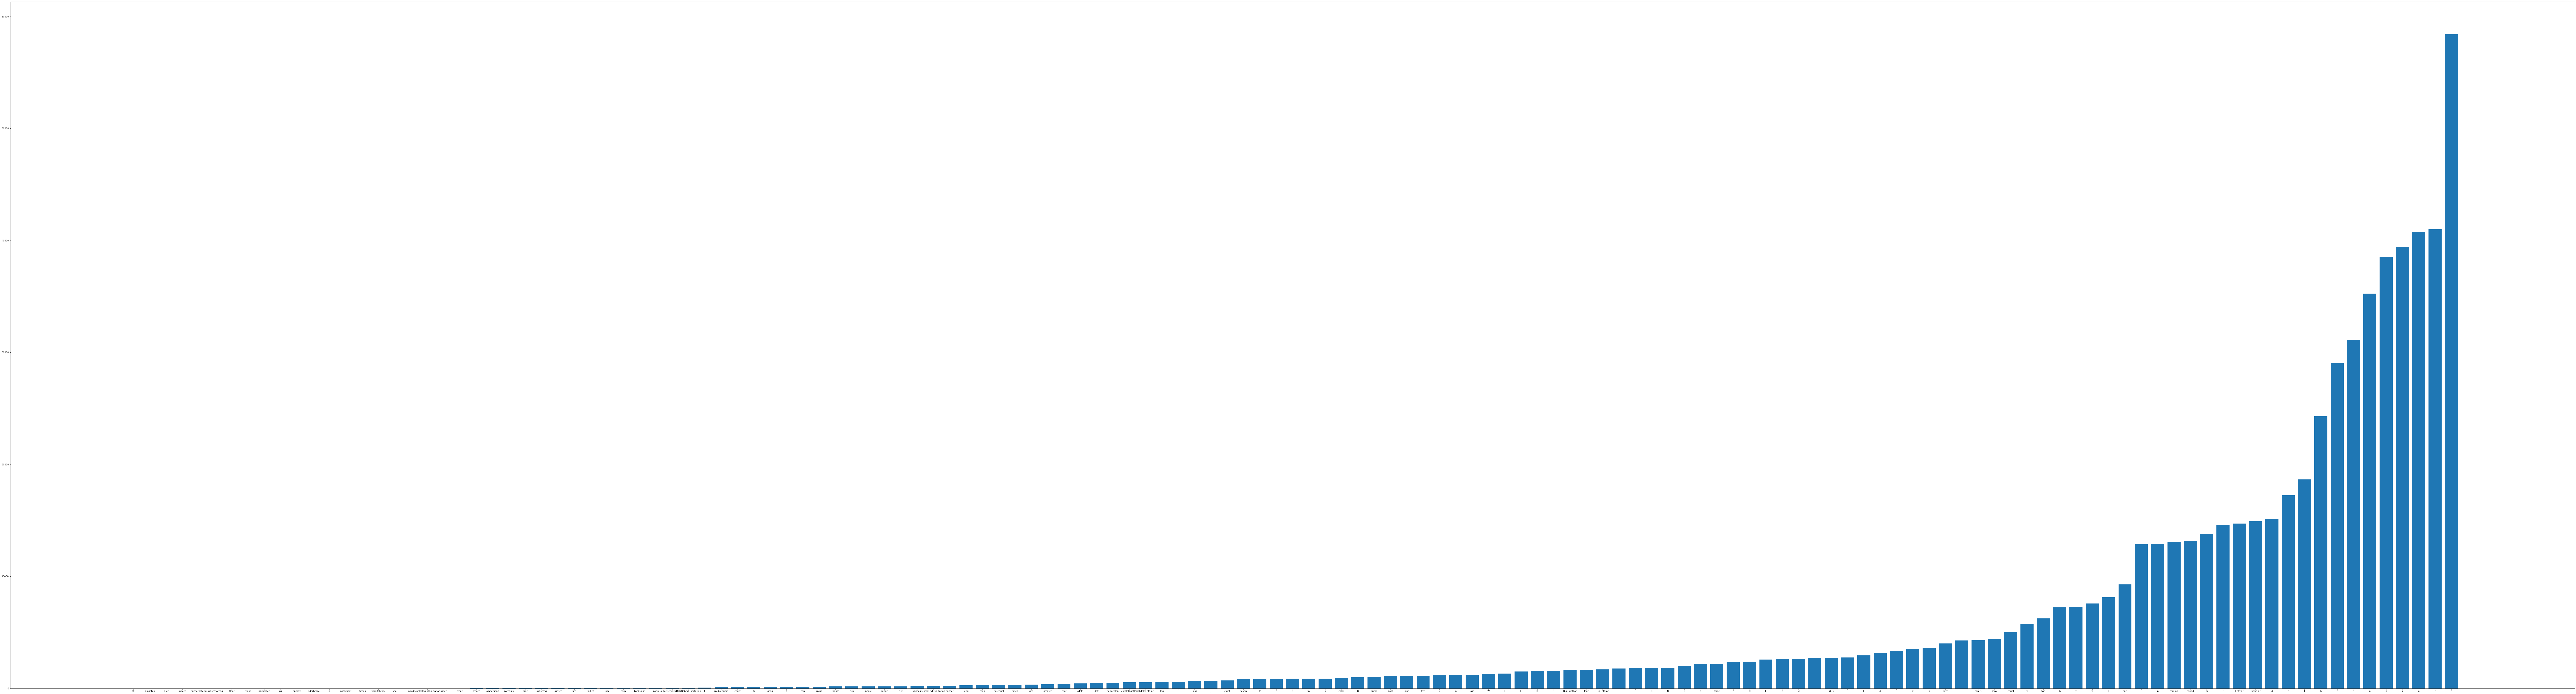

In [64]:
print(len(grp))
plt.figure(figsize=(200,55))
plt.bar(list(grp.keys()), grp.values())
# plt.show()

{'doubleprime': 108, 'equiv': 118, 'ffi': 130, 'geqq': 133, 'ff': 140, 'cap': 141, 'oplus': 163, 'langle': 173, 'cup': 173, 'rangle': 182, 'wedge': 183, 'circ': 184, 'otimes': 191, 'SingleEndQuartation': 204, 'subset': 213, 'leqq': 279, 'cong': 295, 'notequal': 298, 'times': 315, 'geq': 341, 'greater': 359, 'cdot': 407, 'cdots': 447, 'ldots': 490, 'semicolon': 503, 'MiddleRightPar': 557, 'MiddleLeftPar': 558, 'leq': 581, 'Q': 587, 'less': 663, 'J': 693, 'eight': 722, 'seven': 829, 'V': 834, 'Z': 837, 'X': 871, 'six': 876, 'Y': 882, 'colon': 915, 'U': 1010, 'prime': 1045, 'slash': 1121, 'nine': 1126, 'five': 1134, 'fi': 1156, 'in': 1190, 'ast': 1215, 'W': 1305, 'B': 1327, 'F': 1512, 'D': 1550, 'K': 1570, 'BigRightPar': 1672, 'four': 1683, 'BigLeftPar': 1690, 'j': 1770, 'O': 1817, 'G': 1826, 'N': 1841, 'H': 2014, 'q': 2172, 'three': 2190, 'P': 2370, 'C': 2393, 'L': 2585, 'z': 2636, 'M': 2656, 'I': 2696, 'plus': 2737, 'R': 2758, 'E': 2950, 'A': 3176, 'S': 3329, 'x': 3519, 'k': 3611, 'vert

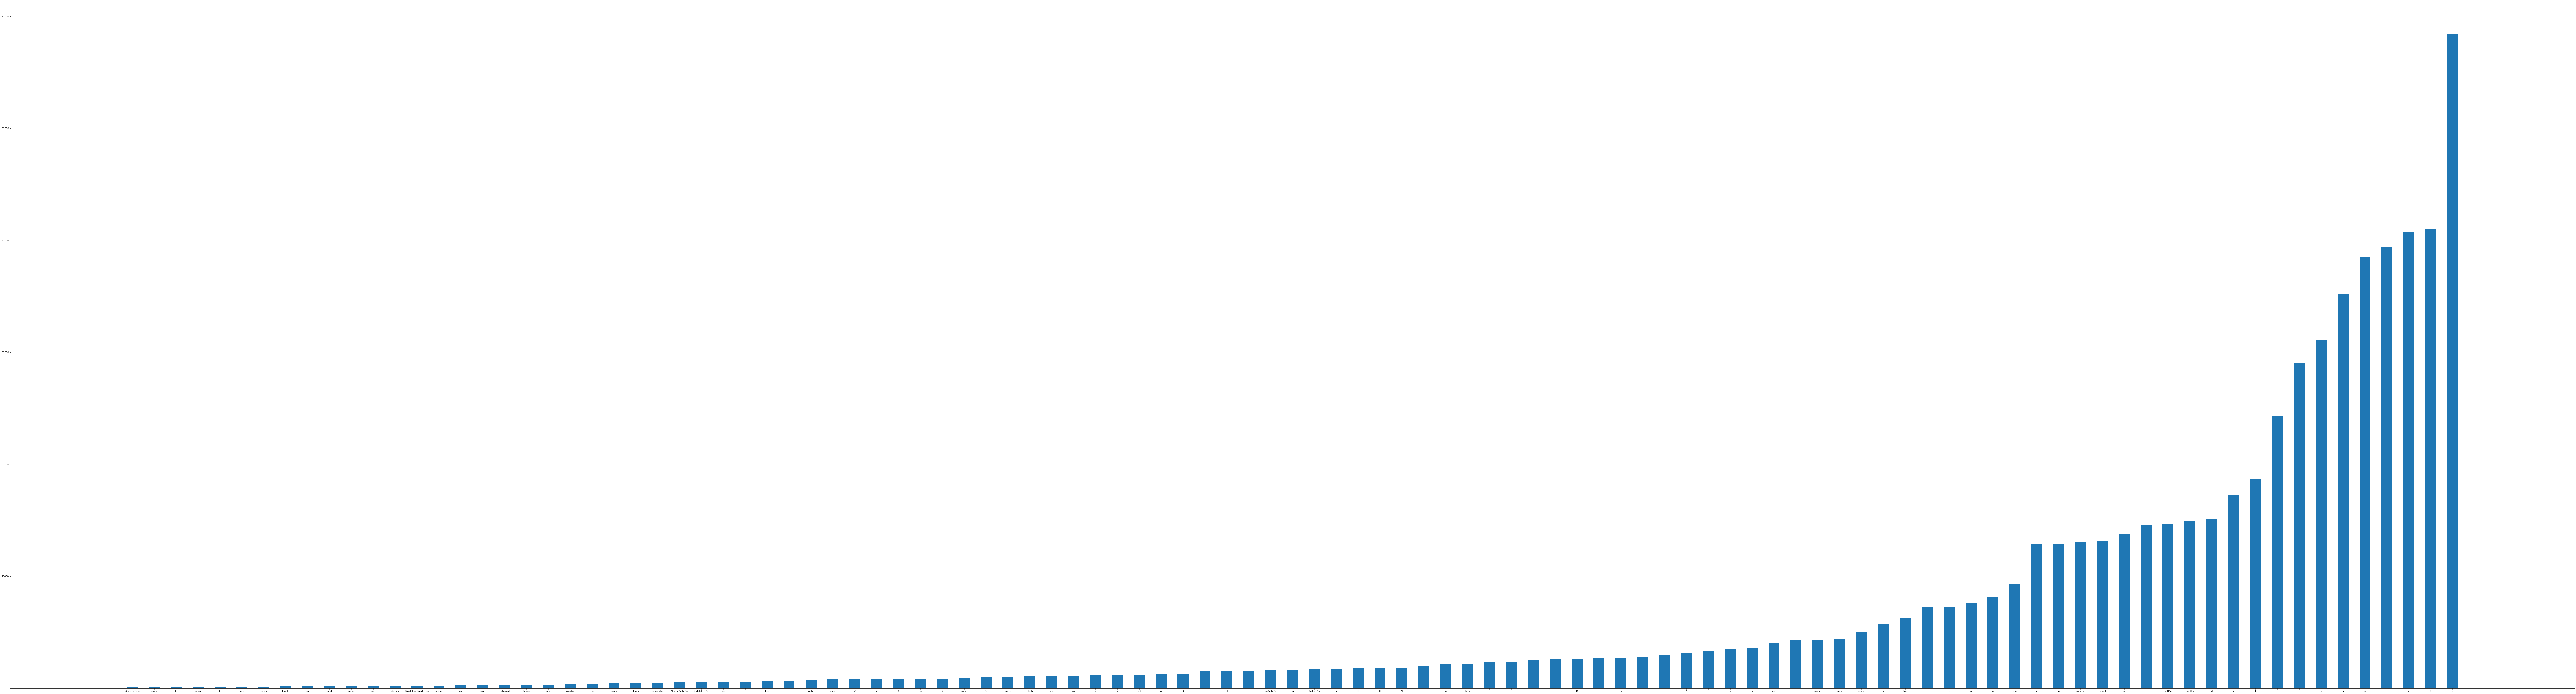

In [29]:
newgrp={}
for k,v in grp.items():
    if v > 100:
        newgrp[k]=v
newgrp = {k: v for k, v in sorted(newgrp.items(), key=lambda item: item[1])}
plt.figure(figsize=(200,55))
plt.bar(list(newgrp.keys()), newgrp.values(), width=0.5)
print(newgrp)

In [31]:
print(grp['comma'])

13088


In [42]:
grp = {}
lst={}
newlst=[]
for i,row in df.iterrows():
    if row['code'] in grp:
        grp[row['code']]+=1
    else :
        lst[row['code']] = [row['type'], row['entity'], row['region']]
        newlst += [ [row['code'], row['type'], row['entity'], row['region']] ]
        print(row['code'], row['type'], row['entity'], row['region'])
        grp[row['code']] = 1

print(len(lst))
print(len(grp))
print(grp)

0141 Roman A text
0161 Roman a text
4161 Roman a text
0162 Roman b text
016C Roman l text
0165 Roman e text
016F Roman o text
0175 Roman u text
0174 Roman t text
0176 Roman v text
4162 Roman b text
416F Roman o text
4176 Roman v text
4165 Roman e text
142C Point comma text
142E Point period text
0173 Roman s text
0172 Roman r text
0163 Roman c text
0179 Roman y text
0142 Roman B text
0153 Roman S text
0154 Roman T text
0152 Roman R text
0143 Roman C text
0164 Roman d text
016D Roman m text
0169 Roman i text
0170 Roman p text
016E Roman n text
0167 Roman g text
014B Roman K text
014E Roman N text
014F Roman O text
0157 Roman W text
014C Roman L text
0145 Roman E text
0144 Roman D text
0147 Roman G text
014D Roman M text
4163 Roman c text
4174 Roman t text
4169 Roman i text
416E Roman n text
4167 Roman g text
4173 Roman s text
016A Roman j text
2161 Roman a text
2164 Roman d text
216A Roman j text
216F Roman o text
2169 Roman i text
216E Roman n text
2174 Roman t text
4164 Roman d text
4

In [44]:
print('0161',lst['0161'] , grp['0161'])
print('2161',lst['2161'] , grp['2161'])
print('4161',lst['4161'] , grp['4161'])
print(len(newlst))
print(newlst)

0161 ['Roman', 'a', 'text'] 28729
2161 ['Roman', 'a', 'text'] 305
4161 ['Roman', 'a', 'text'] 6217
302
[['0141', 'Roman', 'A', 'text'], ['0161', 'Roman', 'a', 'text'], ['4161', 'Roman', 'a', 'text'], ['0162', 'Roman', 'b', 'text'], ['016C', 'Roman', 'l', 'text'], ['0165', 'Roman', 'e', 'text'], ['016F', 'Roman', 'o', 'text'], ['0175', 'Roman', 'u', 'text'], ['0174', 'Roman', 't', 'text'], ['0176', 'Roman', 'v', 'text'], ['4162', 'Roman', 'b', 'text'], ['416F', 'Roman', 'o', 'text'], ['4176', 'Roman', 'v', 'text'], ['4165', 'Roman', 'e', 'text'], ['142C', 'Point', 'comma', 'text'], ['142E', 'Point', 'period', 'text'], ['0173', 'Roman', 's', 'text'], ['0172', 'Roman', 'r', 'text'], ['0163', 'Roman', 'c', 'text'], ['0179', 'Roman', 'y', 'text'], ['0142', 'Roman', 'B', 'text'], ['0153', 'Roman', 'S', 'text'], ['0154', 'Roman', 'T', 'text'], ['0152', 'Roman', 'R', 'text'], ['0143', 'Roman', 'C', 'text'], ['0164', 'Roman', 'd', 'text'], ['016D', 'Roman', 'm', 'text'], ['0169', 'Roman', 'i', 

In [50]:
df1 = pd.DataFrame(newlst, columns=['a','b','c','d'])
df1.head()

,a,b,c,d
0,0141,Roman,A,text
1,0161,Roman,a,text
2,4161,Roman,a,text
3,0162,Roman,b,text
4,016C,Roman,l,text


In [58]:
df1.groupby('b').describe()

a                       c                               d  \
            count unique   top freq count unique           top freq count   
b                                                                           
Numeric        30     30  0130    1    30     10           one    3    30   
Operator       50     50  1C2D    1    50     50  subsetnoteqq    1    50   
Parenthesis    14     14  1982    1    14     12      RightPar    2    14   
Point          20     20  342C    1    20     14        period    2    20   
Roman         188    188  0175    1   188     57             F    4   188   

                               
            unique   top freq  
b                              
Numeric          2  text   29  
Operator         2  math   48  
Parenthesis      2  math   10  
Point            2  text   14  
Roman            2  text  157

In [61]:
with pd.option_context('display.max_rows', 999):
    print (df1)

        a            b                      c     d
0    0141        Roman                      A  text
1    0161        Roman                      a  text
2    4161        Roman                      a  text
3    0162        Roman                      b  text
4    016C        Roman                      l  text
5    0165        Roman                      e  text
6    016F        Roman                      o  text
7    0175        Roman                      u  text
8    0174        Roman                      t  text
9    0176        Roman                      v  text
10   4162        Roman                      b  text
11   416F        Roman                      o  text
12   4176        Roman                      v  text
13   4165        Roman                      e  text
14   142C        Point                  comma  text
15   142E        Point                 period  text
16   0173        Roman                      s  text
17   0172        Roman                      r  text
18   0163   

In [62]:
df1.sort_values("b", axis = 0, ascending = True, inplace = True, na_position ='last')
with pd.option_context('display.max_rows', 999):
    print (df1)

        a            b                      c     d
200  2137      Numeric                  seven  text
207  2139      Numeric                   nine  text
201  2138      Numeric                  eight  text
107  0135      Numeric                   five  text
199  4133      Numeric                  three  text
198  4131      Numeric                    one  text
197  4135      Numeric                   five  text
196  2136      Numeric                    six  text
195  2135      Numeric                   five  text
194  4132      Numeric                    two  text
193  4134      Numeric                   four  text
192  2133      Numeric                  three  text
191  2132      Numeric                    two  text
188  0136      Numeric                    six  text
187  2134      Numeric                   four  text
186  2130      Numeric                   zero  text
185  2131      Numeric                    one  text
178  0134      Numeric                   four  text
177  0139   

In [66]:
grp2 = {k: v for k, v in sorted(grp.items(), key=lambda item: item[0])}
print(grp2)

{'A': 3177, 'B': 1328, 'BigLeftPar': 1691, 'BigRightPar': 1673, 'C': 2394, 'D': 1551, 'DoubleBeginQuartation': 52, 'DoubleEndQuartation': 53, 'E': 2951, 'F': 1513, 'G': 1827, 'H': 2015, 'I': 2697, 'J': 694, 'K': 1571, 'L': 2586, 'LeftPar': 14731, 'M': 2657, 'MiddleLeftPar': 559, 'MiddleRightPar': 558, 'N': 1842, 'O': 1818, 'P': 2371, 'Q': 588, 'R': 2759, 'RightPar': 14938, 'S': 3330, 'SingleBeginQuartation': 6, 'SingleEndQuartation': 205, 'T': 4282, 'U': 1011, 'V': 835, 'W': 1306, 'X': 872, 'Y': 883, 'Z': 838, 'a': 35251, 'ampersand': 9, 'approx': 1, 'ast': 1216, 'b': 7244, 'backslash': 38, 'bullet': 25, 'c': 17249, 'cap': 142, 'cdot': 408, 'cdots': 448, 'circ': 185, 'colon': 916, 'comma': 13089, 'cong': 296, 'cup': 174, 'd': 15110, 'doubleprime': 109, 'e': 58403, 'eight': 723, 'equal': 5011, 'equiv': 119, 'f': 14622, 'ff': 141, 'ffi': 131, 'ffl': 1, 'fi': 1157, 'five': 1135, 'fl': 88, 'four': 1684, 'g': 8141, 'geq': 342, 'geqq': 134, 'gg': 1, 'greater': 360, 'h': 24293, 'i': 39416, 'i

In [67]:
classes = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
          'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',
          'zero','one','two','three','four','five','six','seven','eight','nine',
          'equal','times','slash','ampersand','minus','plus','backslash',
          'BigLeftPar','LeftPar','MiddleLeftPar','RightPar','BigRightPar','MiddleRightPar',
          'semicolon','cdot','comma','period']

mydata = {x : grp2[x] for x in classes}
print(len(mydata), mydata)

79 {'A': 3177, 'B': 1328, 'C': 2394, 'D': 1551, 'E': 2951, 'F': 1513, 'G': 1827, 'H': 2015, 'I': 2697, 'J': 694, 'K': 1571, 'L': 2586, 'M': 2657, 'N': 1842, 'O': 1818, 'P': 2371, 'Q': 588, 'R': 2759, 'S': 3330, 'T': 4282, 'U': 1011, 'V': 835, 'W': 1306, 'X': 872, 'Y': 883, 'Z': 838, 'a': 35251, 'b': 7244, 'c': 17249, 'd': 15110, 'e': 58403, 'f': 14622, 'g': 8141, 'h': 24293, 'i': 39416, 'j': 1771, 'k': 3612, 'l': 18656, 'm': 13802, 'n': 38526, 'o': 40760, 'p': 12918, 'q': 2173, 'r': 29037, 's': 31127, 't': 40992, 'u': 12885, 'v': 5767, 'w': 7592, 'x': 3520, 'y': 7247, 'z': 2637, 'zero': 4403, 'one': 9293, 'two': 6256, 'three': 2191, 'four': 1684, 'five': 1135, 'six': 877, 'seven': 830, 'eight': 723, 'nine': 1127, 'equal': 5011, 'times': 316, 'slash': 1122, 'ampersand': 9, 'minus': 4301, 'plus': 2738, 'backslash': 38, 'BigLeftPar': 1691, 'LeftPar': 14731, 'MiddleLeftPar': 559, 'RightPar': 14938, 'BigRightPar': 1673, 'MiddleRightPar': 558, 'semicolon': 504, 'cdot': 408, 'comma': 13089, '

<BarContainer object of 79 artists>

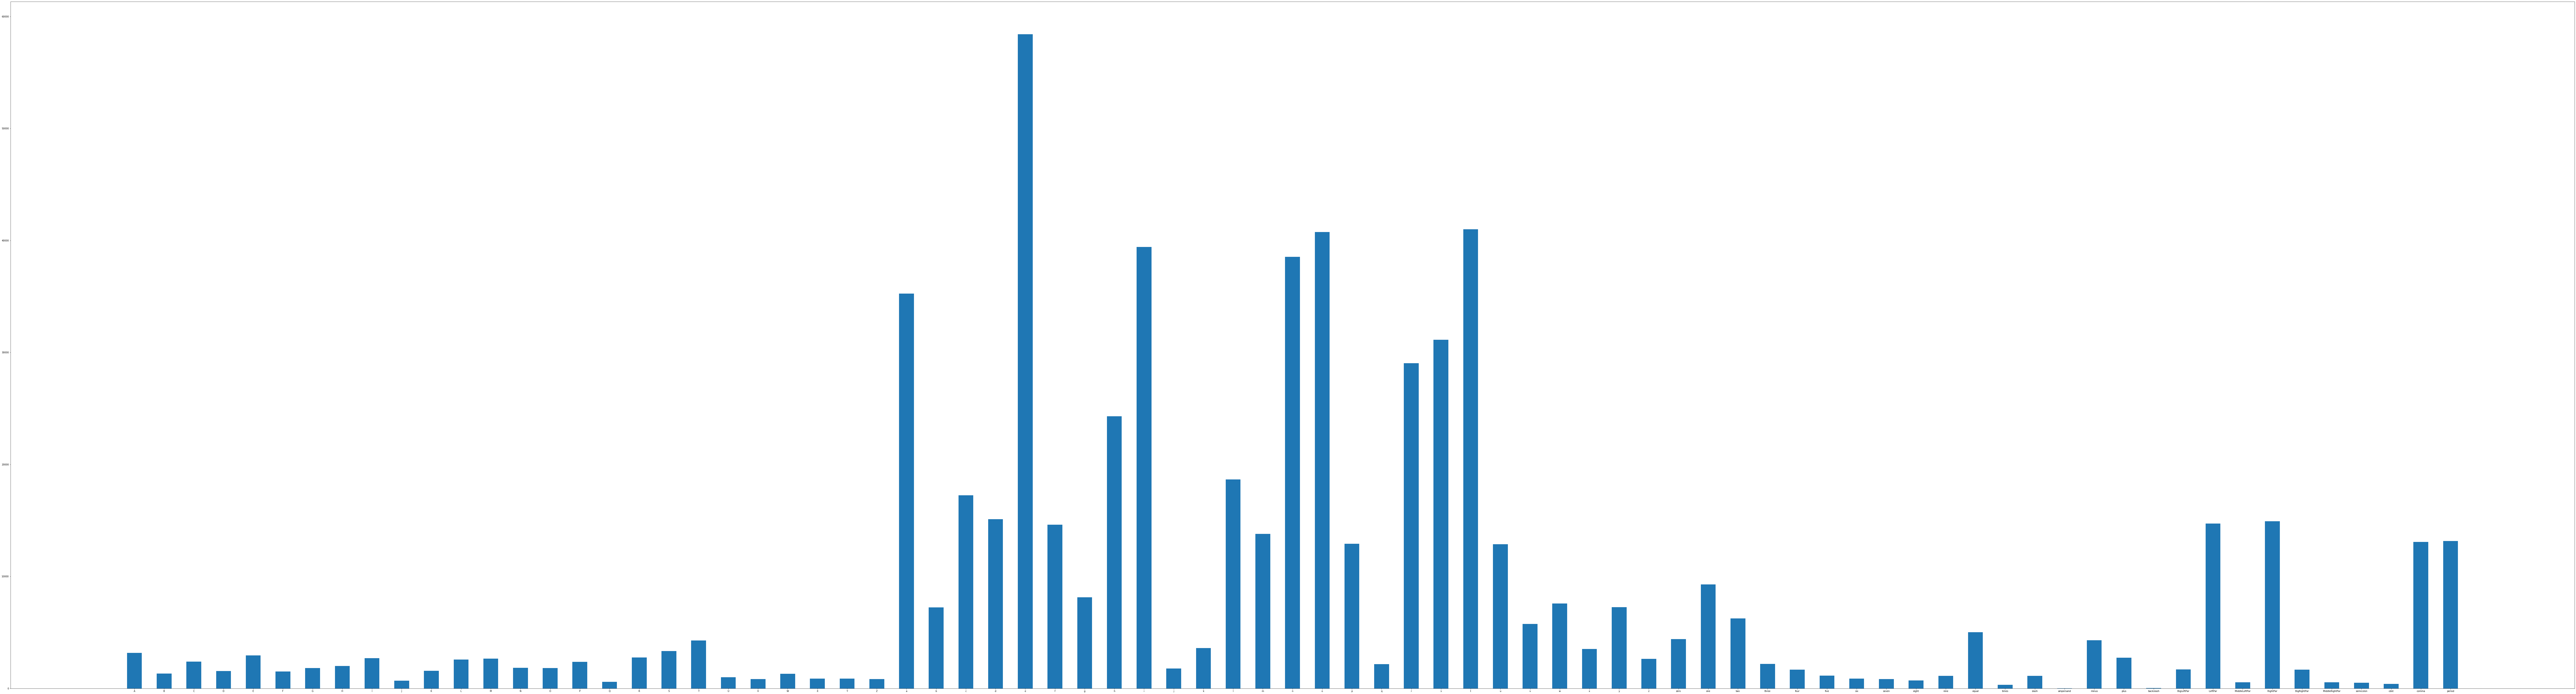

In [68]:
plt.figure(figsize=(200,55))
plt.bar(list(mydata.keys()), mydata.values(), width=0.5)

In [69]:
grp2 = {k: v for k, v in sorted(mydata.items(), key=lambda item: item[1])}
print(grp2)

{'ampersand': 9, 'backslash': 38, 'times': 316, 'cdot': 408, 'semicolon': 504, 'MiddleRightPar': 558, 'MiddleLeftPar': 559, 'Q': 588, 'J': 694, 'eight': 723, 'seven': 830, 'V': 835, 'Z': 838, 'X': 872, 'six': 877, 'Y': 883, 'U': 1011, 'slash': 1122, 'nine': 1127, 'five': 1135, 'W': 1306, 'B': 1328, 'F': 1513, 'D': 1551, 'K': 1571, 'BigRightPar': 1673, 'four': 1684, 'BigLeftPar': 1691, 'j': 1771, 'O': 1818, 'G': 1827, 'N': 1842, 'H': 2015, 'q': 2173, 'three': 2191, 'P': 2371, 'C': 2394, 'L': 2586, 'z': 2637, 'M': 2657, 'I': 2697, 'plus': 2738, 'R': 2759, 'E': 2951, 'A': 3177, 'S': 3330, 'x': 3520, 'k': 3612, 'T': 4282, 'minus': 4301, 'zero': 4403, 'equal': 5011, 'v': 5767, 'two': 6256, 'b': 7244, 'y': 7247, 'w': 7592, 'g': 8141, 'one': 9293, 'u': 12885, 'p': 12918, 'comma': 13089, 'period': 13158, 'm': 13802, 'f': 14622, 'LeftPar': 14731, 'RightPar': 14938, 'd': 15110, 'c': 17249, 'l': 18656, 'h': 24293, 'r': 29037, 's': 31127, 'a': 35251, 'n': 38526, 'i': 39416, 'o': 40760, 't': 40992,

In [70]:
newdf = df
newdf.sort_values("imageName", axis = 0, ascending = True, inplace = True, na_position ='last')
newdf.head(20)

,charId,journalId,sheetId,type,code,entity,region,baseline,italicFlag,boldFlag,...,rectry,wordID,wordMath,wordTex,wordIML,wordRectRY,wordRectRX,wordRectLY,wordRectLX,lineContinueFlag
36360,39335,0,0,Roman,0169,i,text,1,0,0,...,4105,21000000,using,using,using,1662,4061,1818,4118,0
13884,13930,0,0,Roman,0165,e,text,1,0,0,...,1944,12000010,les,les,les,1472,1898,1546,1945,0
13883,13929,0,0,Roman,016C,l,text,1,0,0,...,1944,12000010,les,les,les,1472,1898,1546,1945,0
13882,13928,0,0,Roman,0173,s,text,1,0,0,...,1944,12000008,les,les,les,1348,1898,1421,1944,0
13881,13927,0,0,Roman,0165,e,text,1,0,0,...,1944,12000008,les,les,les,1348,1898,1421,1944,0
13880,13926,0,0,Roman,016C,l,text,1,0,0,...,1943,12000008,les,les,les,1348,1898,1421,1944,0
13879,13925,0,0,Roman,0173,s,text,1,0,0,...,1944,12000004,les,les,les,1224,1898,1297,1944,0
13885,13931,0,0,Roman,0173,s,text,1,0,0,...,1945,12000010,les,les,les,1472,1898,1546,1945,0
13878,13924,0,0,Roman,0165,e,text,1,0,0,...,1944,12000004,les,les,les,1224,1898,1297,1944,0
13876,13922,0,0,Roman,0173,s,text,1,0,0,...,1944,12000002,les,les,les,1101,1898,1173,1944,0


In [75]:
with pd.option_context('display.max_columns', 999):
    print(newdf.head(50))

       charId  journalId  sheetId   type  code entity region  baseline  \
36360   39335          0        0  Roman  0169      i   text         1   
13884   13930          0        0  Roman  0165      e   text         1   
13883   13929          0        0  Roman  016C      l   text         1   
13882   13928          0        0  Roman  0173      s   text         1   
13881   13927          0        0  Roman  0165      e   text         1   
13880   13926          0        0  Roman  016C      l   text         1   
13879   13925          0        0  Roman  0173      s   text         1   
13885   13931          0        0  Roman  0173      s   text         1   
13878   13924          0        0  Roman  0165      e   text         1   
13876   13922          0        0  Roman  0173      s   text         1   
13875   13921          0        0  Roman  0165      e   text         1   
13874   13920          0        0  Roman  016C      l   text         1   
13873   13919          0        0  Rom

In [80]:
names=["charId","journalId","sheetId","type","code","entity","region","baseline","italicFlag","boldFlag","quality","width","height","parentCharId","link","imageName","rectlx","rectly","rectrx","rectry","wordID","wordMath","wordTex","wordIML","wordRectRY","wordRectRX","wordRectLY","wordRectLX","lineContinueFlag"]
mydf = []
countDict={}
for c in classes:
    countDict[c]=0
for i,row in newdf.iterrows():
    if row['entity'] in countDict:
        if countDict[row['entity']] < 500:
            mydf.append(row)
            countDict[row['entity']]+=1
mydf = pd.DataFrame(mydf,columns=names)
mydf.head(10)

,charId,journalId,sheetId,type,code,entity,region,baseline,italicFlag,boldFlag,quality,width,height,parentCharId,link,imageName,rectlx,rectly,rectrx,rectry,wordID,wordMath,wordTex,wordIML,wordRectRY,wordRectRX,wordRectLY,wordRectLX,lineContinueFlag
36360,39335,0,0,Roman,0169,i,text,1,0,0,normal,15,45,39334,HORIZONTAL,00_000.png,1729,4061,1743,4105,21000000,using,using,using,1662,4061,1818,4118,0
13884,13930,0,0,Roman,0165,e,text,1,0,0,normal,28,31,13929,HORIZONTAL,00_000.png,1491,1914,1518,1944,12000010,les,les,les,1472,1898,1546,1945,0
13883,13929,0,0,Roman,016C,l,text,1,0,0,normal,16,47,-1,TOP,00_000.png,1472,1898,1487,1944,12000010,les,les,les,1472,1898,1546,1945,0
13882,13928,0,0,Roman,0173,s,text,1,0,0,normal,24,31,13927,HORIZONTAL,00_000.png,1398,1914,1421,1944,12000008,les,les,les,1348,1898,1421,1944,0
13881,13927,0,0,Roman,0165,e,text,1,0,0,normal,28,31,13926,HORIZONTAL,00_000.png,1367,1914,1394,1944,12000008,les,les,les,1348,1898,1421,1944,0
13880,13926,0,0,Roman,016C,l,text,1,0,0,normal,16,46,-1,TOP,00_000.png,1348,1898,1363,1943,12000008,les,les,les,1348,1898,1421,1944,0
13879,13925,0,0,Roman,0173,s,text,1,0,0,normal,24,30,13924,HORIZONTAL,00_000.png,1274,1915,1297,1944,12000004,les,les,les,1224,1898,1297,1944,0
13885,13931,0,0,Roman,0173,s,text,1,0,0,normal,24,31,13930,HORIZONTAL,00_000.png,1523,1915,1546,1945,12000010,les,les,les,1472,1898,1546,1945,0
13878,13924,0,0,Roman,0165,e,text,1,0,0,normal,29,30,13923,HORIZONTAL,00_000.png,1242,1915,1270,1944,12000004,les,les,les,1224,1898,1297,1944,0
13876,13922,0,0,Roman,0173,s,text,1,0,0,normal,23,31,13921,HORIZONTAL,00_000.png,1151,1914,1173,1944,12000002,les,les,les,1101,1898,1173,1944,0


In [83]:
mydf.shape

(38271, 29)

79


<BarContainer object of 79 artists>

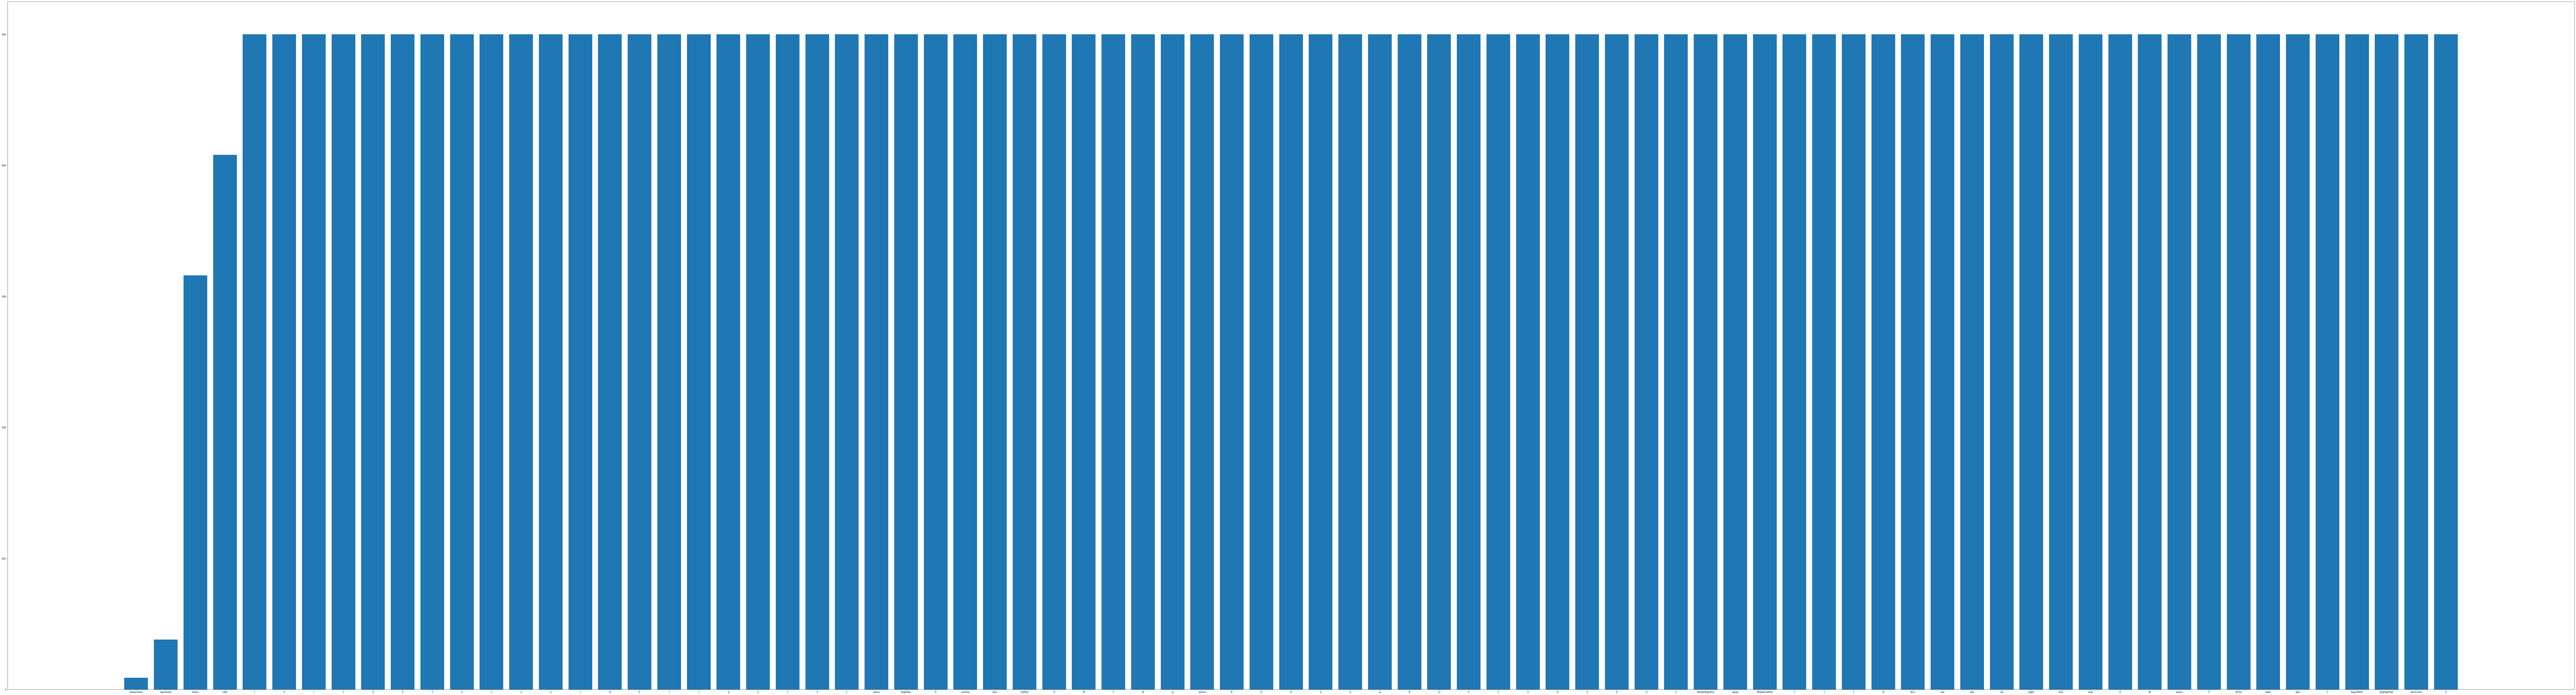

In [84]:
grp = {}
for i,row in mydf.iterrows():
    if row['entity'] in grp:
        grp[row['entity']]+=1
    else :
        grp[row['entity']] = 1

grp = {k: v for k, v in sorted(grp.items(), key=lambda item: item[1])}
# print(grp)
print(len(grp))
plt.figure(figsize=(200,55))
plt.bar(list(grp.keys()), grp.values())

# Image Preprocessing

In [93]:
import cv2
from matplotlib.pyplot import imshow
%matplotlib inline
from IPython.display import Image, display

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


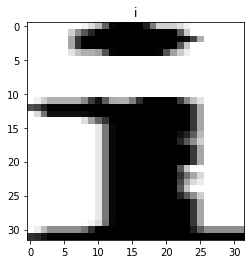

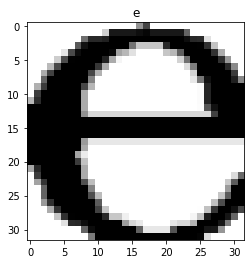

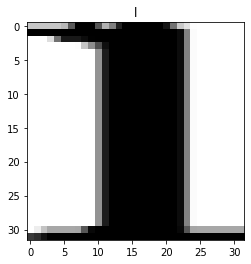

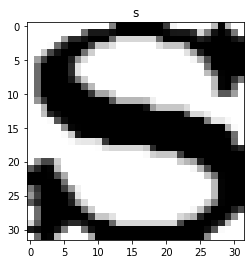

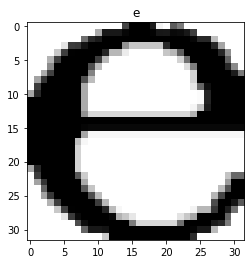

In [115]:
ii=-1
for i,row in mydf.iterrows():
    ii+=1
    if ii > 4:
        break
    else:
        img = cv2.imread("Images/"+row['imageName'],0)
        xl = row['rectlx']
        yl = row['rectly']
        xr = row['rectrx']
        yr = row['rectry']
        letter = img[int(yl):int(yr),int(xl):int(xr)]
        letter = cv2.resize(letter,(32,32))
        print(letter.shape)
        plt.figure()
        plt.imshow(letter,cmap='gray')
        plt.title(row['entity'])

# Keras Module

In [116]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [128]:
mapping={i:v for i,v in enumerate(classes)}
inv_mapping = {v:k for k,v in mapping.items()}
print(mapping)
print(inv_mapping)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'a', 27: 'b', 28: 'c', 29: 'd', 30: 'e', 31: 'f', 32: 'g', 33: 'h', 34: 'i', 35: 'j', 36: 'k', 37: 'l', 38: 'm', 39: 'n', 40: 'o', 41: 'p', 42: 'q', 43: 'r', 44: 's', 45: 't', 46: 'u', 47: 'v', 48: 'w', 49: 'x', 50: 'y', 51: 'z', 52: 'zero', 53: 'one', 54: 'two', 55: 'three', 56: 'four', 57: 'five', 58: 'six', 59: 'seven', 60: 'eight', 61: 'nine', 62: 'equal', 63: 'times', 64: 'slash', 65: 'ampersand', 66: 'minus', 67: 'plus', 68: 'backslash', 69: 'BigLeftPar', 70: 'LeftPar', 71: 'MiddleLeftPar', 72: 'RightPar', 73: 'BigRightPar', 74: 'MiddleRightPar', 75: 'semicolon', 76: 'cdot', 77: 'comma', 78: 'period'}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S'

In [117]:
X=[]
Y=[]
x_input_shape=32
for i,row in mydf.iterrows():
    img = cv2.imread("Images/"+row['imageName'],0)
    xl = row['rectlx']
    yl = row['rectly']
    xr = row['rectrx']
    yr = row['rectry']
    letter = img[int(yl):int(yr),int(xl):int(xr)]
    letter = cv2.resize(letter,(x_input_shape,x_input_shape))
    X.append(letter.reshape(1,x_input_shape,x_input_shape))
    Y.append(row['entity'])

x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size=0.20, random_state=0)

In [137]:
Y1=[]
for x in Y:
    Y1.append(inv_mapping[str(x)])

x_train, x_test, y_train, y_test = train_test_split (X, Y1, test_size=0.20, random_state=0)

In [138]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30616, 1, 32, 32)
(30616, 79)
(7655, 1, 32, 32)
(7655, 79)


In [140]:
print(y_train[1])
x_input_shape=32

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0.]


In [143]:
K.set_image_data_format('channels_first')
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(1, x_input_shape, x_input_shape), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 28, 28)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 14, 14)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 12, 12)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 6, 6)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 6, 6)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               69248     
__________

In [144]:
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=2000, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Use tf.cast instead.
Train on 30616 samples, validate on 7655 samples
Epoch 1/10
30616/30616 [==============================] - 24s 779us/step - loss: 8.5493 - acc: 0.0339 - val_loss: 4.1373 - val_acc: 0.0593
Epoch 2/10
30616/30616 [==============================] - 28s 899us/step - loss: 3.8428 - acc: 0.1204 - val_loss: 2.8928 - val_acc: 0.3057
Epoch 3/10
30616/30616 [==============================] - 25s 819us/step - loss: 2.1851 - acc: 0.4383 - val_loss: 0.8972 - val_acc: 0.7752
Epoch 4/10
30616/30616 [==============================] - 408s 13ms/step - loss: 0.7228 - acc: 0.8081 - val_loss: 0.2293 - val_acc: 0.9429
Epoch 5/10
30616/30616 [==============================] - 21s 677us/step - loss: 0.2633 - acc: 0.9266 - val_loss: 0.1154 - val_acc: 0.9649
Epoch 6/10
30616/30616 [==============================] - 20s 659us/step - loss: 0.1573 - acc: 0.9521 - val_loss: 0.0817 - val_acc: 0.9748
Epoch 7/10
30616/30616 [==============================] - 21s 678us/s

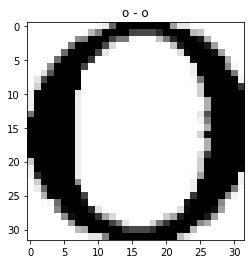

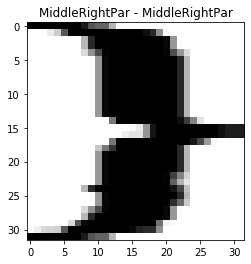

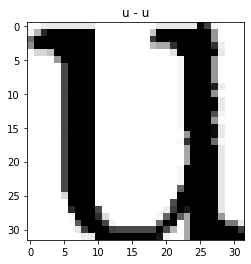

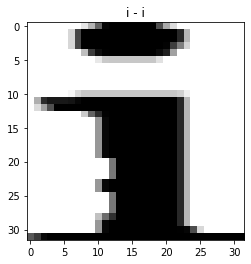

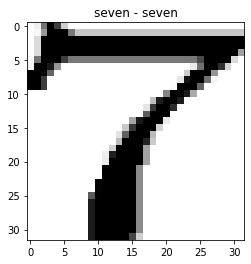

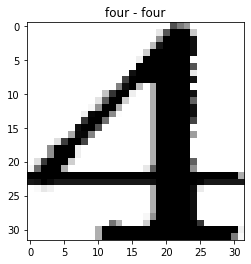

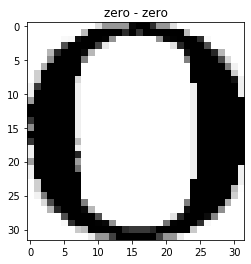

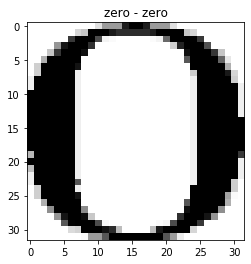

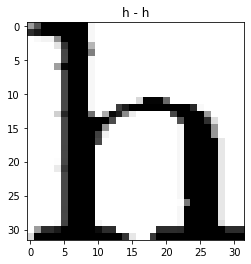

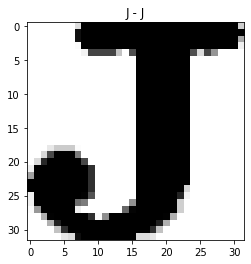

In [152]:
for i in range(10):
    plt.figure()
    plt.imshow(x_train[i].reshape(32,32),cmap='gray')
    y = np.argmax(model.predict(x_train[i].reshape(1,1,32,32)))
    plt.title(mapping[y] + " - " + mapping[np.argmax(y_train[i])] )

In [153]:
model_name = "NeuralNet"
model.save(model_name+".h5")

In [154]:
from keras.models import load_model
loaded_model = load_model(model_name+".h5")
score = loaded_model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

7655/7655 [==============================] - 2s 213us/step
acc: 98.30%


In [156]:
print(x_train[1])

[[[  0   0   0 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 240 215 ... 255 255 255]
  [  0   0   0 ... 255 255 255]]]


In [157]:
def image_for_extraction(raw_image):
    raw_image = cv2.GaussianBlur(raw_image,(3,3),0)
    ret,no_sm_bw_image = cv2.threshold(raw_image,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return no_sm_bw_image

In [160]:
X[0].shape

(1, 32, 32)

In [163]:
Xnew=[]
Ynew=Y1
for img in X:
    img = img.reshape(x_input_shape,x_input_shape)
    img = image_for_extraction(img)
    Xnew.append(img.reshape(1,x_input_shape,x_input_shape))

x_train, x_test, y_train, y_test = train_test_split (Xnew, Ynew, test_size=0.20, random_state=0)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [164]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30616, 1, 32, 32)
(30616, 79)
(7655, 1, 32, 32)
(7655, 79)


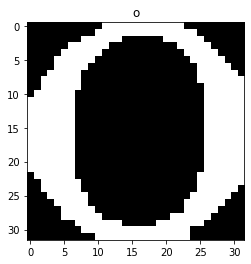

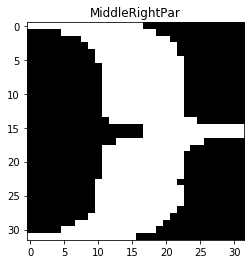

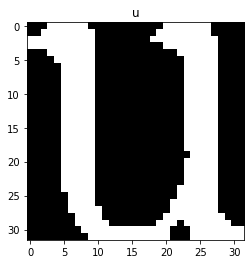

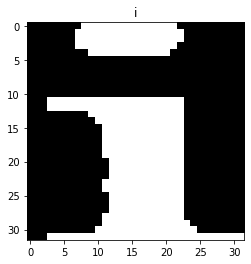

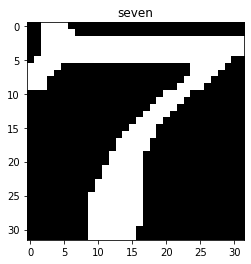

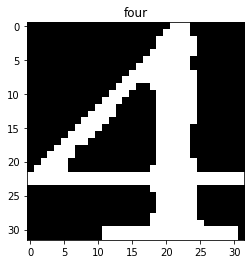

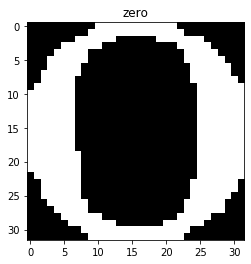

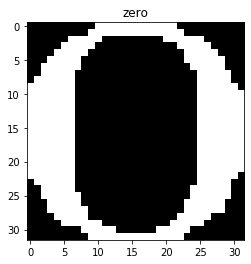

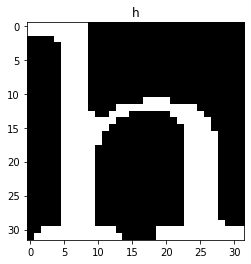

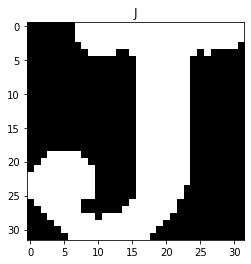

In [166]:
for i in range(10):
    plt.figure()
    plt.imshow(x_train[i].reshape(32,32),cmap='gray')
    plt.title(mapping[np.argmax(y_train[i])] )

In [165]:
model1 = Sequential()
model1.add(Conv2D(30, (5, 5), input_shape=(1, x_input_shape, x_input_shape), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(15, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(50, activation='relu'))
model1.add(Dense(len(classes), activation='softmax'))
# Compile model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 28, 28)        780       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 14, 14)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 12, 12)        4065      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 6, 6)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 6, 6)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               69248     
__________

In [167]:
# Fit the model
model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=2000, verbose=1)

# Final evaluation of the model
scores = model1.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 30616 samples, validate on 7655 samples
Epoch 1/10
30616/30616 [==============================] - 21s 694us/step - loss: 7.5175 - acc: 0.0540 - val_loss: 3.9701 - val_acc: 0.1280
Epoch 2/10
30616/30616 [==============================] - 20s 664us/step - loss: 3.3754 - acc: 0.2228 - val_loss: 2.0710 - val_acc: 0.5140
Epoch 3/10
30616/30616 [==============================] - 20s 654us/step - loss: 1.5689 - acc: 0.6011 - val_loss: 0.5983 - val_acc: 0.8428
Epoch 4/10
30616/30616 [==============================] - 20s 653us/step - loss: 0.5298 - acc: 0.8543 - val_loss: 0.1769 - val_acc: 0.9480
Epoch 5/10
30616/30616 [==============================] - 20s 658us/step - loss: 0.2409 - acc: 0.9239 - val_loss: 0.0971 - val_acc: 0.9697
Epoch 6/10
30616/30616 [==============================] - 20s 662us/step - loss: 0.1588 - acc: 0.9488 - val_loss: 0.0792 - val_acc: 0.9737
Epoch 7/10
30616/30616 [==============================] - 20s 656us/step - loss: 0.1191 - acc: 0.9591 - val_loss: 0.0

In [168]:
model.save("NewNeuralNet.h5")

In [186]:
img = cv2.imread("Images/0_0_0.png")
print(img.shape)

from PIL import Image
img2 = Image.open('Images/0_0_0.png')
img2 = np.asarray(img2)
img2 = img2[3:29,3:29]
img2 = cv2.resize(img2,(32,32))
img2 = img2.reshape(1,1,32,32)
print(img2.shape)

print(mapping[np.argmax(loaded_model.predict(img2))] )

(32, 32, 3)
(1, 1, 32, 32)
period


Text(0.5, 1.0, 'O')

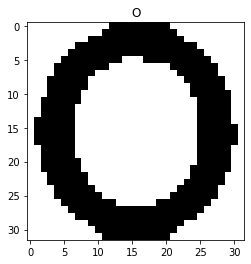

In [194]:
img = cv2.imread("Images/0_0_1.png",0)
# img.shape
img = img[3:29,3:29]
img = cv2.resize(img,(32,32))
img = image_for_extraction(img)
plt.figure()
plt.imshow(img.reshape(32,32),cmap='gray')
plt.title( mapping[np.argmax(loaded_model.predict(img.reshape(1,1,32,32)))] )